In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-ivp-basics)=
# Basics of IVPs

```{index} ! initial-value problem
```

(definition-basics-scalarivp)=
::::{proof:definition} Initial-value problem (scalar)
A scalar first-order **initial-value problem** (IVP) is
  
```{math}
:label: IVP
\begin{split}
   u'(t) &= f(t,u(t)), \qquad a \le t \le b,  \\
  u(a) &=u_0.
\end{split}
```

We call $t$ the **independent variable** and $u$ the **dependent variable**. If $u'=f(t,u)=g(t)+u h(t)$, the differential equation is **linear**; otherwise, it is **nonlinear**.

A **solution** of an initial-value problem is a function $u(t)$ that makes both $u'(t)=f\bigl(t,u(t)\bigr)$ and $u(a)=u_0$ true equations.
::::

When $t$ is meant to be time, sometimes we write $\dot{u}$ (read "u-dot") instead of $u'$. 

::::{proof:example}
  Suppose $u(t)$ is the size of a population at time $t$. We idealize by allowing $u$ to take any real (not just integer) value. If we assume a constant per capita birth rate (births per unit population per unit time), then
  
```{math}
\frac{d u}{d t} = k u, \qquad u(0)=u_0
```

for some $k>0$. The solution of this linear equation is $u(t)=e^{kt}u_0$, which is exponential growth.

A more realistic model would cap the growth due to finite resources. Suppose the death rate is proportional to the size of the population, indicating competition. Then

```{math}
  :label: logistic
  \frac{d u}{d t} = ku - ru^2, \qquad u(0)=u_0.
```

```{index} ! logistic equation
```

This is the **logistic equation**. Although crude, it is still useful in population models.  The solution relevant for population models has the form
  
```{math}
  u(t) = \frac{k/r}{ 1 + \left( \frac{k}{r u_0} - 1 \right) e^{-k t} }.
```

For $k,r,u_0>0$, the solution smoothly varies from the initial population $u_0$ to a finite population, equal to $k/r$, that has been limited by competition.
::::

Linear problems can be solved in terms of integrals. Defining the *integrating factor* $\rho(t) = \exp\bigl[\int -h(t)\, dt \bigr]$, the solution is derived from

```{math}
  \rho(t) u(t) = u_0 + \int_a^t \rho(s) g(s) \, ds.
```

In many cases, however, the necessary integrals cannot be done in closed form. Some nonlinear ODEs, such as separable equations, may also be solvable with a short formula, perhaps with difficult integrations. Most often, though, there is no analytic formula available for the solution.

An ODE may have higher derivatives of the unknown solution present. For example, a **second-order ordinary differential equation** is often given in the form $u''(t)=f\bigl(t,u,u'\bigr)$. A second-order IVP requires two conditions at the initial time in order to specify a solution completely. As we will see in {numref}`section-ivp-systems`, we are always able to reformulate higher-order IVPs in a first-order form, so we will deal with first-order problems exclusively. 

## Numerical solutions


(demo-basics-first)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

The `DifferentialEquations` package offers solvers for IVPs. Let's use it to define and solve an initial-value problem for $u'=\sin[(u+t)^2]$ over $t \in [0,4]$, such that $u(0)=1$.  

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Because many practical problems come with parameters that are fixed within an instance but varied from one instance to another, the syntax for IVPs includes a input argument `p` that stays fixed throughout the solution. Here we don't want to use that argument, but it must be in the definition for the solver to work.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
To create an initial-value problem for $u(t)$, you must supply a function that computes $u'$, an initial value for $u$, and the endpoints of the interval for $t$. The $t$ interval should be defined as `(a,b)`, where at least one of the values is a float.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

```{index} ! Julia; ODEProblem, ! Julia; solve
```

In [2]:
f = (u,p,t) -> sin((t+u)^2)     # defines du/dt, must include p argument
u₀ = -1.0                       # initial value
tspan = (0.0,4.0)               # t interval 

(0.0, 4.0)

With the data above we define an IVP problem object and then solve it. Here we tell the solver to use the `Tsit5` method, which is a good first choice for most problems.

In [3]:
ivp = ODEProblem(f,u₀,tspan)
sol = solve(ivp,Tsit5());

The resulting solution object can be shown using `plot`.

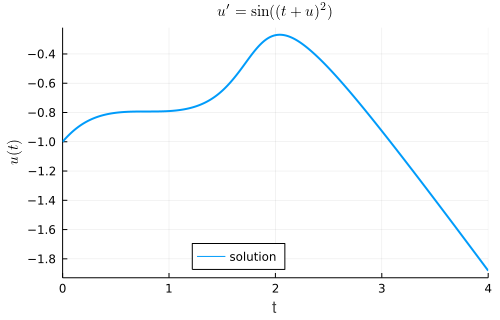

In [4]:
plot(sol,label="solution",legend=:bottom,
    xlabel="t",ylabel=L"u(t)",title=L"u'=\sin((t+u)^2)")

The solution also acts like any callable function that can be evaluated at different values of $t$.

In [5]:
@show sol(1.0);

sol(1.0) = -0.7903205813677855


Under the hood, the solution object holds some information about how the values and plot are produced:

In [6]:
[sol.t sol.u]

15×2 Matrix{Float64}:
 0.0        -1.0
 0.0867807  -0.93483
 0.241035   -0.856617
 0.464665   -0.805668
 0.696832   -0.793614
 1.00862    -0.789925
 1.37461    -0.718601
 1.70407    -0.476837
 1.93572    -0.29033
 2.17184    -0.294994
 2.4843     -0.483948
 2.69425    -0.654121
 3.27049    -1.1783
 3.62534    -1.51729
 4.0        -1.88086

The solver initially finds approximate values of the solution (second column above) at some automatically chosen times (first column above). To compute the solution at other times, the object performs an interpolation on those values. This chapter is about how the discrete $t$ and $u$ values are computed. For now, just note how we can extract them from the solution object.

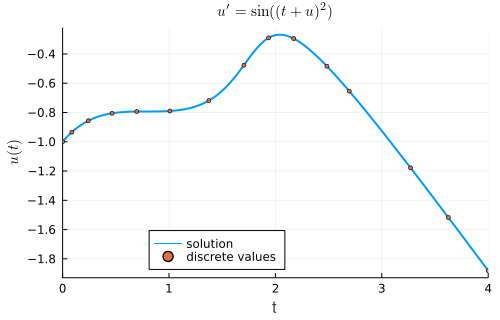

In [7]:
scatter!(sol.t,sol.u,label="discrete values")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


## Existence and uniqueness

There are simple IVPs that do not have solutions at all possible times. 

(demo-basics-sing)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

The equation $u'=(u+t)^2$ gives us some trouble.

In [8]:
f = (u,p,t) -> (t+u)^2

ivp = ODEProblem(f,1.0,(0.,1.))
sol = solve(ivp,Tsit5());

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/driscoll/.julia/packages/SciMLBase/BoNUy/src/integrator_interface.jl:345


The warning message we received can mean that there is a bug in the formulation of the problem. But if everything has been done correctly, it suggests that the solution may not exist past the indicated time. This is a possibility in nonlinear ODEs.

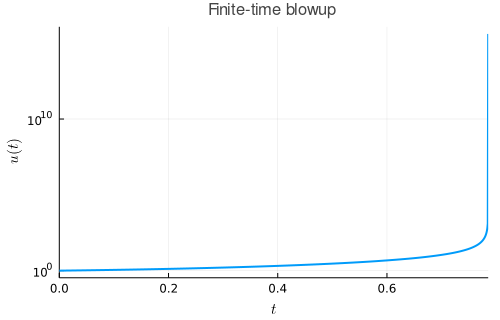

In [9]:
plot(sol, label="",
    xlabel=L"t",yaxis=(:log10,L"u(t)"), title="Finite-time blowup")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

We can also produce an IVP that has more than one solution.

````{proof:example}
  The functions $u(t)=u^2$ and $u(t)\equiv 0$ both satisfy the differential equation $u'=2\sqrt{u}$ and the initial condition $u(0)=0$. Thus the corresponding IVP has more than one solution.
````

The following standard theorem gives us a condition that is easy to check and guarantees that a unique solution exists. But it is not the most general possible such condition, so there are problems with a unique solution that it cannot detect. We state the theorem without proof.

(theorem-existunique)=
````{proof:theorem} Existence and uniqueness

If the derivative $\frac{\partial f}{\partial u}$ exists and $\left|\frac{\partial f}{\partial u}\right|$ is bounded by a constant $L$ for all $a\le t \le b$ and all $u$, then the initial-value problem {eq}`IVP` has a unique solution for $t\in [a,b]$.
````

## Conditioning of first-order IVPs

```{index} condition number; of initial-value problems
```

In a numerical context we have to be concerned about the conditioning of the IVP. There are two key items in {eq}`IVP` that we might consider to be the data of the initial-value ODE problem: the function $f(t,u)$, and the initial value $u_0$. It's easier to discuss perturbations to numbers than to functions, so we will focus on the effect of $u_0$ on the solution, using the following theorem that we give without proof. Happily, its conditions are identical to those in {numref}`Theorem %s <theorem-existunique>`.

(theorem-depIC)=
````{proof:theorem} Dependence on initial value
If the derivative $\frac{\partial f}{\partial u}$ exists and $\left|\frac{\partial f}{\partial u}\right|$ is bounded by a constant $L$ for all $a\le t \le b$ and all $u$, then the solution $u(t;u_0+\delta)$ of $u'=f(t,u)$ with initial condition $u(0)=u_0+\delta$ satisfies
  
```{math}
:label: depIC
\left\|u(t;u_0+\delta)-u(t;u_0)\right\|_\infty \le |\delta| e^{L(b-a)}
```

for all sufficiently small $|\delta|$.
````

Numerical solutions of IVPs have errors, and those errors can be seen as perturbations to the solution. {numref}`Theorem %s <theorem-depIC>` gives an upper bound of $e^{L(b-a)}$ on the infinity norm (i.e., pointwise) absolute condition number of the solution with respect to perturbations at an initial time. However, the upper bound may be a terrible overestimate of the actual sensitivity for a particular problem.

(demo-basics-cond)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Consider the ODEs $u'=u$ and $u'=-u$. In each case we compute $\partial f/\partial u = \pm 1$, so the condition number bound from {numref}`Theorem %s <theorem-depIC>` is $e^{b-a}$ in both problems. However, they behave quite differently. In the case of exponential growth, $u'=u$, the bound is the actual condition number.

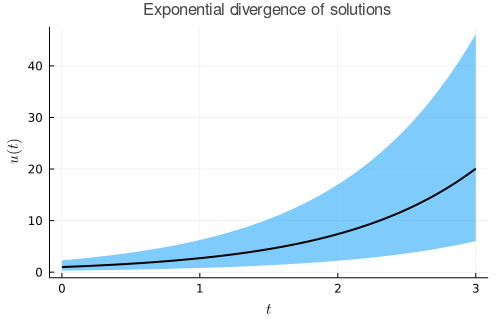

In [10]:
t = range(0,3,length=800)
u = @. exp(t)*1
lower,upper = @. exp(t)*0.7, @. exp(t)*1.3
plot(t,u,l=:black,ribbon=(lower,upper),
    leg=:none,xlabel=L"t",ylabel=L"u(t)",
    title="Exponential divergence of solutions")

But with $u'=-u$, solutions actually get closer together with time.

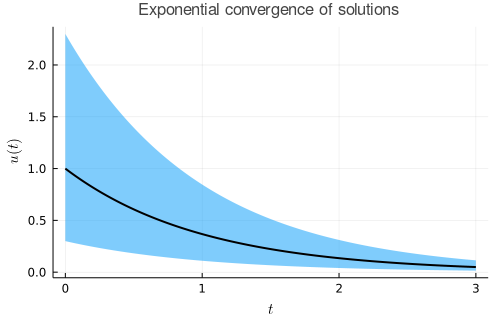

In [11]:
u = @. exp(-t)*1
lower,upper = @. exp(-t)*0.7, @. exp(-t)*1.3
plot(t,u,l=:black,ribbon=(lower,upper),
    leg=:none,xlabel=L"t",ylabel=L"u(t)", 
    title="Exponential convergence of solutions")

In this case the actual condition number is one, because the initial difference between solutions is the largest over all time. Hence the exponentially growing bound $e^{b-a}$ is a gross overestimate.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

In general, solutions can diverge from, converge to, or oscillate around the original trajectory in response to perturbations. We won't fully consider these behaviors and their implications for numerical methods again until a later chapter.

## Exercises

1. ✍ For each IVP, determine whether the problem satisfies the conditions of {numref}`Theorem %s <theorem-depIC>`). If so, determine the smallest possible value for $L$.

    **(a)** $f(t,u) = 3 u,\; 0 \le t \le 1$

    **(b)** $f(t,u) = -t \sin(u),\; 0 \le t \le 5$

    **(c)** $f(t,u) = -(1+t^2) u^2,\; 1 \le t \le 3$

    **(d)** $f(t,u) = \sqrt{u},\; 0 \le t \le 1$
 
2. ⌨ For each ODE in the preceding problem, assume that $u$ is initially equal to $1$ on the given interval. Solve the resulting IVP with `solve` and make a plot of the solution.

3. ✍ Use an integrating factor to find the solution of each problem in analytic form.

    **(a)** $u' = -t u,\ 0 \le t \le 5,\ u(0) = 2$

    **(b)** $u' - 3 u = e^{-2t},\ 0 \le t \le 1,\  u(0) = 5$

4. ✍ Consider the IVP $u'=u^2$, $u(0)=\alpha$.

    **(a)** Does {numref}`Theorem %s <theorem-existunique>` apply to this problem?

    **(b)** Show that $u(t) = \alpha/(1-\alpha t)$ is a solution of the IVP.

    **(c)** Does this solution necessarily exist for all $t\in[0,1]$?

    ```{index} logistic equation
    ```

5. ⌨ Using `solve`, compute solutions $x(t)$ to the logistic equation with harvesting,

    ```{math}
    x' = k (S-x)(x-M), \qquad 0\le t \le 10,
    ```

    with $k=S=1$ and $M=0.25$, for the initial conditions $x(0)=0.9M$, $1.1M$, $1.5M$, $0.9S$, $1.1S$, $3S$. Show all the solutions together on one plot with $0\le x \le 3$. (Note: One of the solutions will throw a warning and fail to reach $t=10$, but you can plot it anyway.)

6. ⌨ **(a)** Using `solve`, solve the IVP $u'=u\cos(u) + \cos(4t)$, $0\le t \le 10$, $u(0) = u_0$ for $u_0 = -2,-1.5,-1,\ldots,1.5,2$. Plot all the solutions on a single graph. 
    
    **(b)** All of the solutions in part (a) eventually settle into one of two periodic oscillations. To two digits of accuracy, find the value of $u_0$ in $(-1,1)$ at which the selected long-term solution changes. (This will take repeated trials, narrowing down the range for $u_0$ each time.)

    (problem-caffeine)=
7. ⌨ Experimental evidence (see {cite}`newtonPlasmaSalivary1981`) shows that a 300-mg oral dose of caffeine, such as might be found in a large mug of drip-brewed coffee, creates a concentration of about 8 $\mu{\rm g}$/mL in blood plasma. This boost is followed by first-order kinetics with a half-life of about 6 hours (although this rate can vary a great deal from person to person). We can model the caffeine concentration due to one drink taken over half an hour via

    ```{math}
      x'(t) = -kx + C(t),\quad x(0)=0,
    ```

    where $k=\log(2)/6$ and

    ```{math}
      C(t) =
      \begin{cases}
        16, & 0\le t \le 0.5, \\
        0, & t > 0.5.
      \end{cases}
    ```

    Use `solve` to make a plot of the caffeine concentration for 12 hours. Then change $k=\log(2)/8$ (half-life of 8 hours) and plot the solution again.

8. ⌨ A reasonable model of the velocity $v(t)$ of a skydiver is

    $$\frac{dv}{dt} = -g + \frac{k}{m}v^2,  \qquad v(0)=0,$$

    where $g=9.8 \text{ m/sec}^2$ is gravitational acceleration, $m$ is the mass of the skydiver with parachute, and $k$ quantifies the effect of air resistance. At the US Air Force Academy, a training jump starts at about 1200 m and has $k=0.4875$ for $t<13$ and $k=29.16$ or $t\ge 13$. (This is an oversimplification; see {cite}`meadeDifferentialEquations1999`.) 

    **(a)** Solve the IVP for $v$ for an 80-kg cadet for $t\in [0,200]$, and plot the solution.

    **(b)** The total distance fallen up to time $t$ is $\displaystyle\int_0^t v(s)\, ds$. Use {numref}`Function {number} <function-intadapt>` to calculate and plot the altitude of the cadet as a function of time.

    **(c)** In part (b), you should have found that the altitude becomes negative. Use {numref}`Function {number} <function-secant>` to determine accurately when the cadet reaches the ground.